# 어종(魚種) 식별 및 분류 알고리즘 개발

&nbsp;

## 패키지 설치

In [ ]:
!pip install gdown
!pip install comet-ml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 580.1/580.1 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 92.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.0/241.0 kB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.2/512.2 kB 53.6 MB/s eta 0:00:00
  Attempting uninstall: websocket-client
    Found existing installation: websocket-client 1.6.4
    Uninstalling websocket-client-1.6.4:
      Successfully uninstalled websocket-client-1.6.4
  Attempting uninstall: python-box
    Found existing installation: python-box 7.1.1
    Uninstalling python-box-7.1.1:
      Successfully uninstalled python-box-7.1.1


&nbsp;

## comet_ml log 기록

In [ ]:
import comet_ml
comet_ml.init(project_name='Kwater-yolov5')

Please paste your Comet API key from https://www.comet.com/api/my/settings/
(api key may not show as you type)
Comet API key: ··········


COMET INFO: Valid Comet API Key saved in /content/drive/MyDrive/.comet.config (set COMET_CONFIG to change where it is saved).


&nbsp;

## yolov5 설치





In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install
import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-228-g4d687c8 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (8 CPUs, 51.0 GB RAM, 27.1/166.8 GB disk)


- 데이터 다운및 압축 해제

In [ ]:
import gdown
output = "fish_data.zip"
id = "1Liyd6OFW9t3_68FVRIzdLG-mg-y92ttQ"

gdown.download(id=id, output=output, quiet=False)
!unzip -qq kwater_yolo.zip

warning [kwater_yolo.zip]:  23254795958 extra bytes at beginning or within zipfile
  (attempting to process anyway)
error [kwater_yolo.zip]:  start of central directory not found;
  zipfile corrupt.
  (please check that you have transferred or created the zipfile in the
  appropriate BINARY mode and that you have compiled UnZip properly)


&nbsp;

- yolov5 훈련

In [ ]:
!python ./train.py --img 640 --batch 8 --epochs 300 --data ./data.yaml --weights yolov5x.pt --cache --upload_dataset --bbox_interval 1

train: weights=yolov5x.pt, cfg=, data=./data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=True, bbox_interval=1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-227-ge4df1ec Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hs

- test

In [ ]:
!python val.py --data /content/yolov5/data.yaml --save-json --weights  /content/yolov5/runs/train/exp3/weights/best.pt --task test

val: data=/content/yolov5/data.yaml, weights=['/content/yolov5/runs/train/exp3/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=True, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-227-ge4df1ec Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)

Fusing layers... 
Model summary: 157 layers, 7053277 parameters, 0 gradients, 15.9 GFLOPs
test: Scanning /content/yolov5/labels/test... 741 images, 0 backgrounds, 0 corrupt: 100% 741/741 [00:00<00:00, 6052.09it/s]
test: New cache created: /content/yolov5/labels/test.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 24/24 [00:07<00:00,  3.23it/s]
                   all        741        851      0.823      0.818      0.857      0.598
                    베스      

In [ ]:
!python ./detect.py --weights /content/yolov5/runs/train/exp3/weights/best.pt --conf 0.25 --line-thickness 1 --exist-ok --device 0 --source /content/yolov5/images/test

detect: weights=['/content/yolov5/runs/train/exp3/weights/best.pt'], source=/content/yolov5/images/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=True, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-227-ge4df1ec Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)

Fusing layers... 
Model summary: 157 layers, 7053277 parameters, 0 gradients, 15.9 GFLOPs
image 1/741 /content/yolov5/images/test/april_(1_2)_frame_000000.PNG: 480x640 1 블루길, 41.6ms
image 2/741 /content/yolov5/images/test/april_(1_2)_frame_000010.PNG: 480x640 1 블루길, 5.5ms
image 3/741 /content/yolov5/images/test/april_(1_2)_frame_002950.PNG: 480x640 1 붕어, 5.5ms
image 4/741 /content

&nbsp;

## detect test

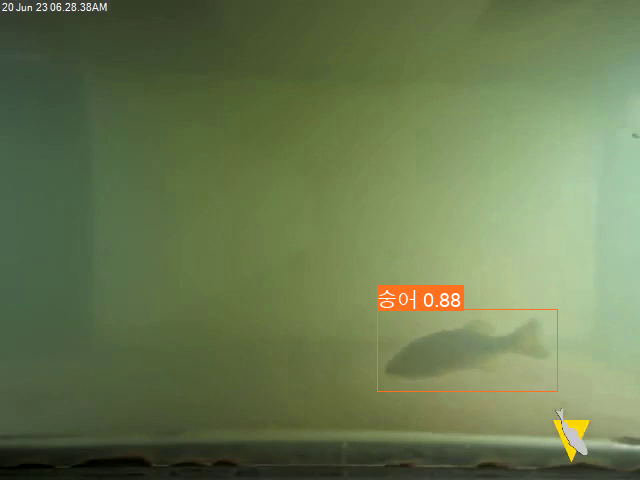

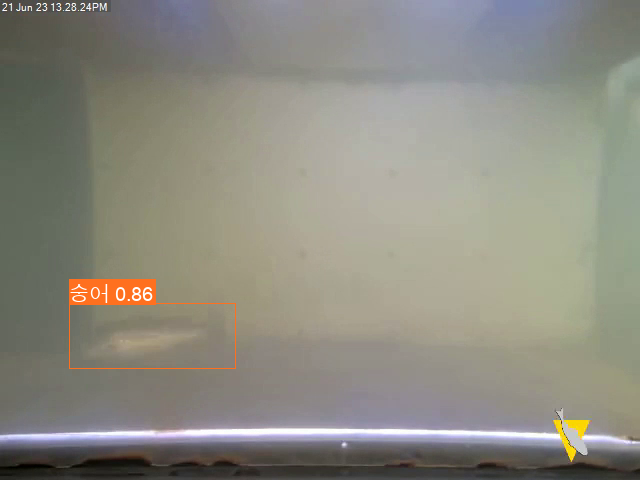

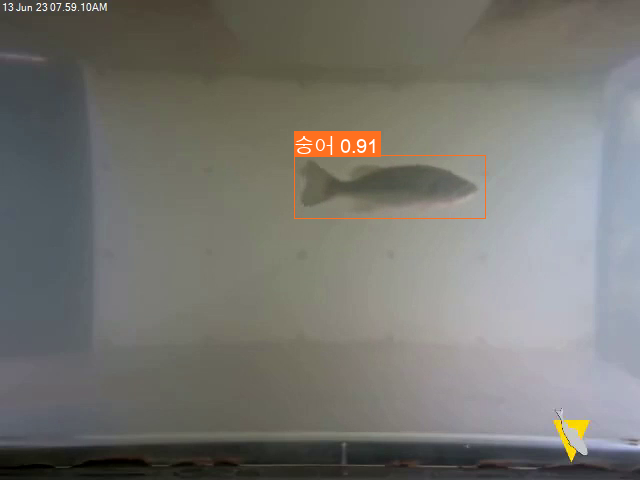

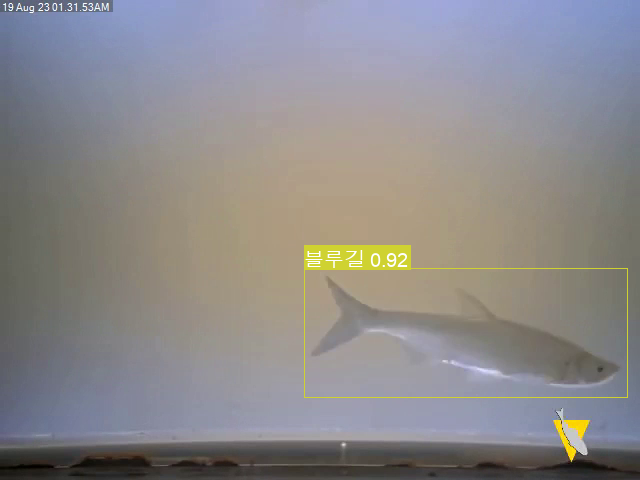

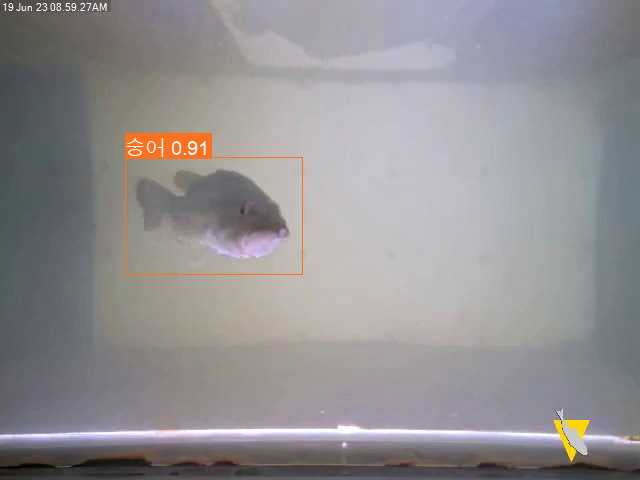

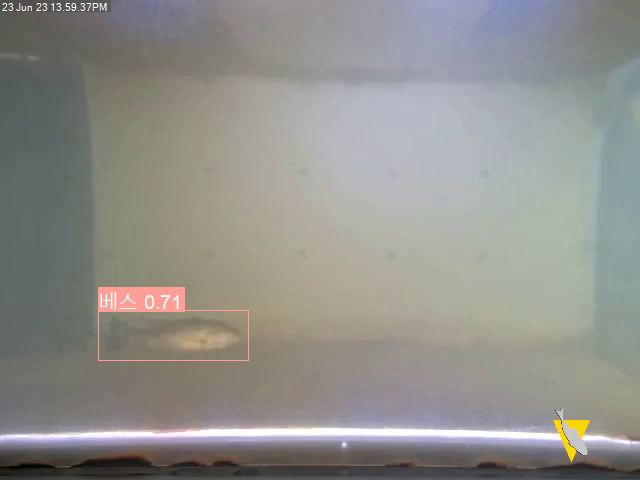

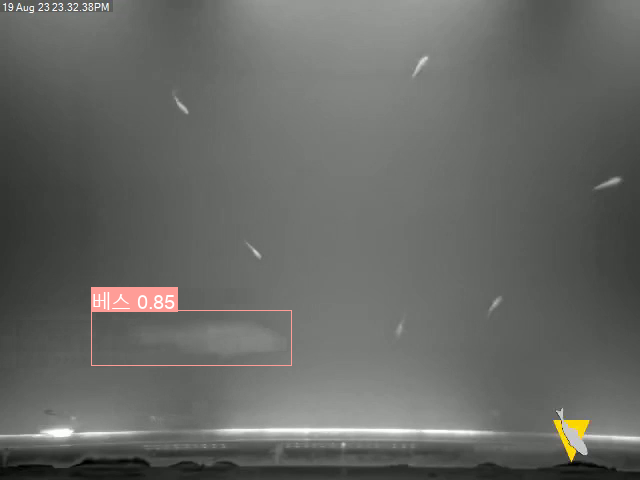

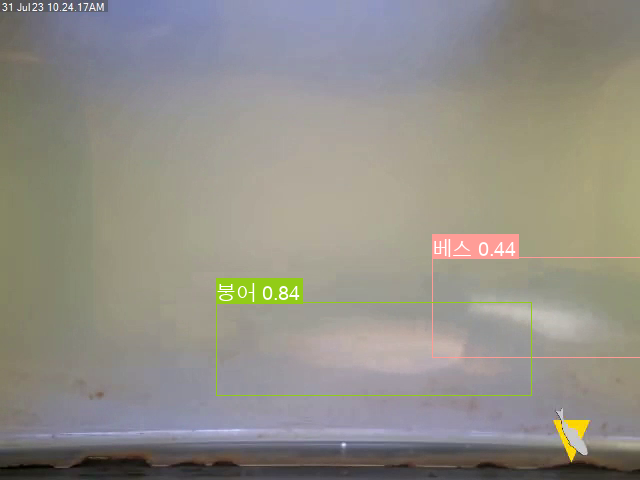

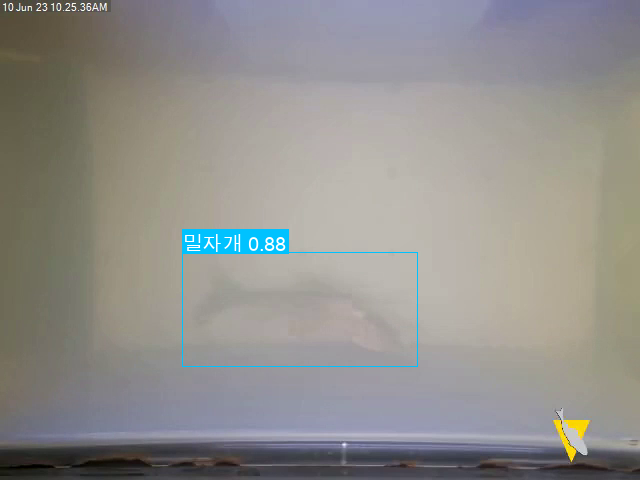

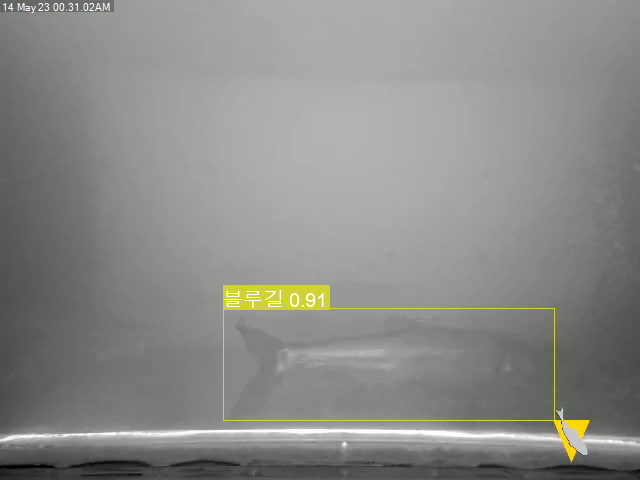

In [ ]:
from glob import glob
import cv2
from google.colab.patches import cv2_imshow
data_list = glob('/content/yolov5/runs/detect/exp/*.PNG')
for i in data_list[:10]:
  src = cv2.imread(i)
  cv2_imshow(src)